In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [25]:
data=pd.read_csv('C:/Users/Armaan/OneDrive/Desktop/WORKSPACE/Datasets/International airlines/international-airline-passengers.csv',usecols=[1])

In [26]:
data.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [27]:
values=data.values.astype('float32')
values.shape

(144, 1)

In [28]:
train_size=int((values.shape[0]*0.67))
testing_size=values.shape[0]-train_size
train=values[0:train_size]
test=values[train_size:]

In [29]:
scalar=MinMaxScaler(feature_range=(0,1))
train=scalar.fit_transform(train)
test=scalar.fit_transform(test)

In [30]:
def create_dataset(data,k):
    datax,datay=[],[]
    for i in range(data.shape[0]-k):
        x=data[i:i+k,0]
        y=data[i+k,0]
        datax.append(x)
        datay.append(y)
    return np.array(datax),np.array(datay)

In [31]:
look_back=12
train_x,train_y=create_dataset(train,look_back)
test_x,test_y=create_dataset(test,look_back)

In [33]:
train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [34]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense

In [35]:
model=Sequential()
model.add(SimpleRNN(4,input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(train_x,train_y,epochs=25,batch_size=1)

Epoch 1/25
84/84 [==============================] - 1s 2ms/step - loss: 0.3527
Epoch 2/25
84/84 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 3/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0837
Epoch 4/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0620
Epoch 5/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 6/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 7/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 8/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 9/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 10/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0207
Epoch 11/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 12/25
84/84 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 13/25
84/84 [==============================

In [37]:
testpredict=model.predict(test_x)
testpredict=scalar.inverse_transform(testpredict).ravel()

trainpredict=model.predict(train_x)
trainpredict=scalar.inverse_transform(trainpredict).ravel()

testtrue=scalar.inverse_transform([test_y]).ravel()
traintrue=scalar.inverse_transform([train_y]).ravel()

testpredict.shape,testtrue.shape

3/3 [==============================] - 0s 2ms/step


((36,), (36,))

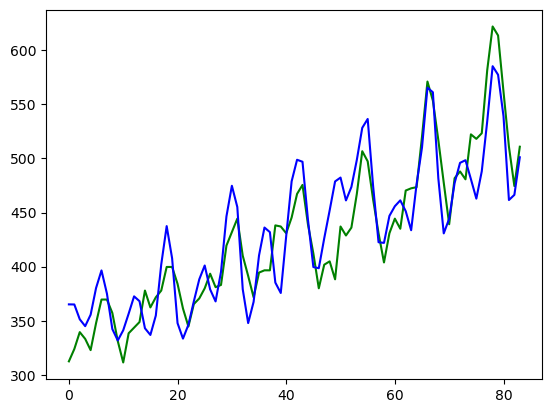

In [39]:
plt.plot(traintrue,c='g')
plt.plot(trainpredict,c='b')
plt.show()

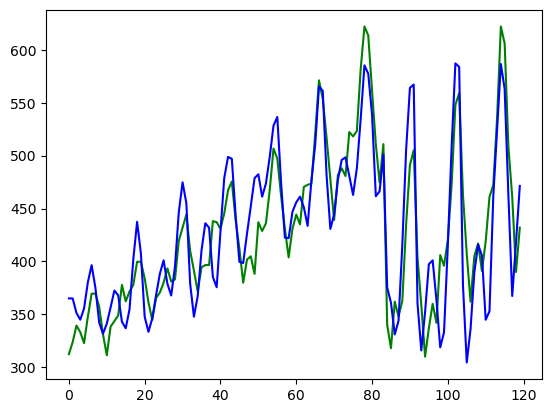

In [42]:
combinedpredict=np.concatenate((trainpredict,testpredict))
combinedtrue=np.concatenate((traintrue,testtrue))

plt.plot(combinedtrue,c='g')
plt.plot(combinedpredict,c='b')
plt.show()